In [1]:
'''Analisis:
- All the data (list = patient with all values)
- BandPower = patient = 12 brain reagions = 5 bands = 1 value
- Lavels structure all patiens with one value = list (no shape)'''

'Analisis:\n- All the data (list = patient with all values)\n- BandPower = patient = 12 brain reagions = 5 bands = 1 value\n- Lavels structure all patiens with one value = list (no shape)'

In [2]:
#Multiple regression is like linear regression, but with more than one independent value, meaning that we try to predict a value based on two or more variables.
import numpy as np
import matplotlib.pyplot as plt
from numpy import savetxt
import pickle
import csv
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.utils import shuffle
import random
import sklearn.metrics as sm
import statistics
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score


import multiprocessing
import xgboost as xgb
import pandas as pd
import numpy as np
import pickle 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
import warnings
warnings.filterwarnings("ignore")
import datetime
starttime = datetime.datetime.now()
import csv
from scipy import stats
import numpy as np
import collections, numpy

def cal_average(num):
    sum_num = 0
    for t in num:
        sum_num = sum_num + t           

    avg = sum_num / len(num)
    return avg

In [3]:
with open("/Users/laianavarroolivella/Proyectos/EEG/2.banpowerEpoch12BR/list_finalEC.txt", "rb") as fp:   # Unpickling
    withEpoch = pickle.load(fp)

with open("/Users/laianavarroolivella/Proyectos/EEG/1.dataToBrainReagions/sorted_list_EC.txt", "rb") as fp:   # Unpickling
    sorted_list_EC_up = pickle.load(fp)

'#Data EO amb 12 brain reagions y els powerband\nwith open("/Users/laianavarroolivella/Proyectos/EEG/3.1 ExtractDataOutliers/Dades_no_outliersEO.txt", "rb") as fp: \n    dataEO = pickle.load(fp)\n\n#Data EC amb 12 brain reagions y els powerband\nwith open("/Users/laianavarroolivella/Proyectos/EEG/3.1 ExtractDataOutliers/Dades_no_outliersEC.txt", "rb") as fp: \n    dataEC = pickle.load(fp)\n\n#Llista dels noms dels pacients EC \nwith open("/Users/laianavarroolivella/Proyectos/EEG/3.1 ExtractDataOutliers/Listoflist_no_outliersEC.txt", "rb") as fp:   # Unpickling\n    listEC_Names = pickle.load(fp)\n\n#Llista dels noms dels pacients EO \nwith open("/Users/laianavarroolivella/Proyectos/EEG/3.1 ExtractDataOutliers/Listoflist_no_outliersEO.txt", "rb") as fp:   # Unpickling\n    listEO_Names = pickle.load(fp)'

In [4]:
#Import the data to analise
#Open the file in universal line ending mode 
with open('/Users/laianavarroolivella/Proyectos/EEG/Files_EEG/TEIQue-SF.csv', 'rU') as infile:
  # read the file as a dictionary for each row ({header : value})
  data = {}
  reader = csv.DictReader(infile)
  for row in reader:
    for header, value in row.items():
      try:
        data[header].append(value)
      except KeyError:
        data[header] = [value]

# extract the variables you want
names = data['ID']
TeiQueSF_emotionality = data['TeiQueSF_emotionality']
TeiQueSF_wellBeing = data['TeiQueSF_well_being']
TeiQueSF_total = data['TeiQueSF_total']

In [5]:
xCorr = []
for e in range(0,len(sorted_list_EC_up)):       #For each frequency band:
    hename = sorted_list_EC_up[e]   #Select the name of the patient
    hename = str(hename[:-7])  #Select only the number witout the extension 
    if hename in names:    #If this is in the testNames:
        indices = [i for i, s in enumerate(names) if hename in s] #Get the position of the testNames
        x = (float(TeiQueSF_wellBeing[int(indices[0])])) #Get the value of the patient in the test selected
        xCorr.append(x) #Add it in to the xCorr
    else:
        print("No esta"+hename)
'''for r in range(0, len(dataEC)): 
    for e in range(0, len(dataEC[r])):  # For each frequency band:
        contadorp = 0
        contadorn = 0
        y_corr = []  # Create variables where will go the pacientData value
        for i in range(0, len(listEC_Names[r][e])):  # For each patient:
            hename = listEC_Names[r][e][i]  # Select the name of the patient
            # Select only the number witout the extension
            hename = str(hename[:-7])
            if hename in names:  # If this is in the testNames:
                # Get the position of the testNames
                indices = [i for i, s in enumerate(names) if hename in s]
                # Get the value of the patient in the test selected
                x = (float(TeiQueSF_wellBeing[int(indices[0])]))
                if float(x)<5:
                    y_corr.append(int(0)) #Add it in to the xCorr
                if float(x)>=5:
                    y_corr.append(int(1)) #Add it in to the xCorr
        
    xCorr.append(y_corr)'''

'for r in range(0, len(dataEC)): \n    for e in range(0, len(dataEC[r])):  # For each frequency band:\n        contadorp = 0\n        contadorn = 0\n        y_corr = []  # Create variables where will go the pacientData value\n        for i in range(0, len(listEC_Names[r][e])):  # For each patient:\n            hename = listEC_Names[r][e][i]  # Select the name of the patient\n            # Select only the number witout the extension\n            hename = str(hename[:-7])\n            if hename in names:  # If this is in the testNames:\n                # Get the position of the testNames\n                indices = [i for i, s in enumerate(names) if hename in s]\n                # Get the value of the patient in the test selected\n                x = (float(TeiQueSF_wellBeing[int(indices[0])]))\n                if float(x)<5:\n                    y_corr.append(int(0)) #Add it in to the xCorr\n                if float(x)>=5:\n                    y_corr.append(int(1)) #Add it in to the xCor

In [6]:
#Epoch (samples data point) all incluede for each subject <- + band + brain region (concatenated)

#All Epochs ! Majoriti points <- find a ave

a = np.array(withEpoch)[3:,:,:]
print(a.shape)
b = a.T
print(b.shape)
c2 = b.reshape(187,45)
print(c2.shape)

(9, 5, 187)
(187, 5, 9)
(187, 45)


In [7]:
#Lavels
Y = np.array(xCorr)
print(type(Y))
print(Y.shape)

<class 'numpy.ndarray'>
(187,)


**************************************************** 0.1
     --
Counter({1: 61, 0: 56})
     Pred:  [0 0 0 1 1 1 0 0 1 0 0 0 1]
     Data:  [1 0 0 1 1 1 0 1 1 0 1 1 1]
     ACC 0.6923076923076923
     F1 0.7142857142857143
     Recal 0.5555555555555556
     Precision 1.0
     --
Counter({1: 62, 0: 55})
     Pred:  [0 0 1 0 1 1 0 1 1 1 1 1 1]
     Data:  [0 0 0 1 1 1 0 1 1 0 1 1 1]
     ACC 0.7692307692307693
     F1 0.823529411764706
     Recal 0.875
     Precision 0.7777777777777778
     --
Counter({1: 61, 0: 56})
     Pred:  [1 1 1 0 0 1 0 1 1 0 1 1 1]
     Data:  [0 1 1 1 0 1 1 1 0 1 0 1 1]
     ACC 0.5384615384615384
     F1 0.6666666666666666
     Recal 0.6666666666666666
     Precision 0.6666666666666666
     --
Counter({1: 62, 0: 55})
     Pred:  [1 1 1 0 0 1 0 1 1 1 0 1 1]
     Data:  [1 0 0 0 1 1 1 1 1 1 0 0 1]
     ACC 0.6153846153846154
     F1 0.7058823529411765
     Recal 0.75
     Precision 0.6666666666666666
     --
Counter({1: 64, 0: 53})
     Pred:  [1 0 1 1 0 1 0 0 0

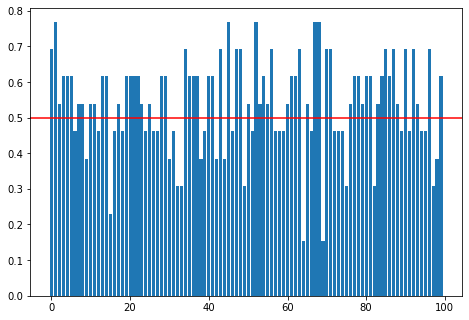

0.5407692307692306
**************************************************** 0.2
     --
Counter({1: 60, 0: 44})
     Pred:  [0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]
     Data:  [0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 0]
     ACC 0.46153846153846156
     F1 0.5
     Recal 0.7
     Precision 0.3888888888888889
     --
Counter({1: 54, 0: 50})
     Pred:  [0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0]
     Data:  [1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1]
     ACC 0.5384615384615384
     F1 0.5714285714285715
     Recal 0.5
     Precision 0.6666666666666666
     --
Counter({1: 57, 0: 47})
     Pred:  [1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0]
     Data:  [1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0]
     ACC 0.6153846153846154
     F1 0.6428571428571429
     Recal 0.6923076923076923
     Precision 0.6
     --
Counter({1: 53, 0: 51})
     Pred:  [0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0]
     Data:  [1 1 0 0 0 1 0 1 1 1 1 1

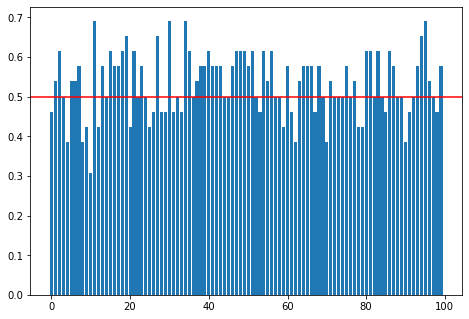

0.5326923076923079
**************************************************** 0.3
     --
Counter({1: 50, 0: 41})
     Pred:  [1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1
 0 0]
     Data:  [1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1
 0 0]
     ACC 0.5384615384615384
     F1 0.5714285714285713
     Recal 0.6
     Precision 0.5454545454545454
     --
Counter({1: 47, 0: 44})
     Pred:  [1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1
 1 1]
     Data:  [0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1
 1 1]
     ACC 0.6410256410256411
     F1 0.6666666666666666
     Recal 0.6086956521739131
     Precision 0.7368421052631579
     --
Counter({1: 55, 0: 36})
     Pred:  [1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0
 0 0]
     Data:  [1 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0
 1 0]
     ACC 0.5128205128205128
     F1 0.577777777

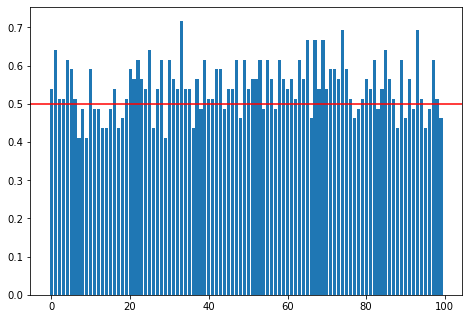

0.5438461538461539
**************************************************** 0.4
     --
Counter({1: 41, 0: 37})
     Pred:  [1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0
 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1]
     Data:  [0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1
 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1]
     ACC 0.5576923076923077
     F1 0.5964912280701754
     Recal 0.5862068965517241
     Precision 0.6071428571428571
     --
Counter({0: 41, 1: 37})
     Pred:  [0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0
 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1]
     Data:  [0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1]
     ACC 0.6346153846153846
     F1 0.6779661016949152
     Recal 0.6060606060606061
     Precision 0.7692307692307693
     --
Counter({1: 40, 0: 38})
     Pred:  [0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1
 1 0 1 0 0 1 0 1 1 1 0 0 1 

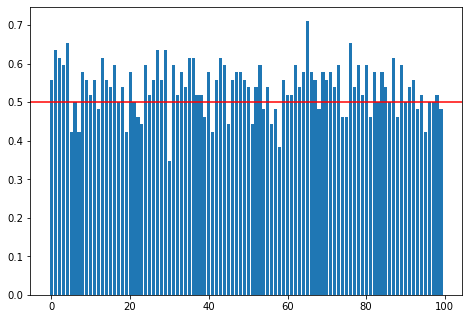

0.5373076923076925


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import neighbors
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB

xin = list(range(100))
th=5.5
numpase = 0 #COUNTER OF THE EPOCHS THAT PAS THE 0.55 ACCURACY
accurt = [] #SAVE THE ACCURACY
f1scoret = []
recallscrt = []
presitt = []
for divider in range(1,5):
    print("**************************************************** "+'0.'+str(divider)) #PRINT THE PARTITION OF THE DATA
    numpase = 0 #COUNTER OF THE EPOCHS THAT PAS THE 0.55 ACCURACY
    accur = [] #SAVE THE ACCURACY
    f1score = []
    recallscr = []
    presit = []
    for t in range(0,100):
        print("     --")
        c = list(zip(c2, xCorr)) # Zip so went we shuffle it dosent disarrange
        random.shuffle(c) #MIXT DATA
        DX, DY = zip(*c) #UNZIP
        Lavels2 = []
        X2=[]
        r=0

        for i  in range(0,len(DY)):
            if DY[i]>=th and r<60:
                Lavels2.append(int(0))
                X2.append(DX[i]) 
                r=r+1
            if DY[i]<th:
                Lavels2.append(int(1))
                X2.append(DX[i])

        X = np.array(X2)#TRANSFORM TO ARRAY
        Y = np.array(Lavels2)


        tnX, ttX, trainY, testY = train_test_split(X, Y, test_size=float('0.'+str(divider))) #DEVIDE DATA

        contt = collections.Counter(trainY)

        if contt[0]>6 and contt[1]>6:
            print(contt)
            mean_data = np.array(tnX)
            X_train = []
            X_train1 = (mean_data[:,0] - np.mean(mean_data[:,0])) / np.std(mean_data[:,0])
            X_train2 = (mean_data[:,1] - np.mean(mean_data[:,1])) / np.std(mean_data[:,1])
            for i in range(0, len(X_train1)):
                unif = []
                unif.append(X_train1[i])
                unif.append(X_train2[i])
                X_train.append(unif)

            mean_d = np.array(ttX)
            X_test = []
            X_test1 = (mean_d[:,0] - np.mean(mean_data[:,0])) / np.std(mean_data[:,0])
            X_test2 = (mean_d[:,1] - np.mean(mean_data[:,1])) / np.std(mean_data[:,1])
            for i in range(0, len(X_test1)):
                unif = []
                unif.append(X_test1[i])
                unif.append(X_test2[i])
                X_test.append(unif)
            X_test = np.array(X_test)
            X_train = np.array(X_train)
            xgb_model = neighbors.KNeighborsClassifier()           
            xgb_model.fit(X_train,trainY)
            predY = xgb_model.predict(X_test)
            print('     Pred: ', predY)
            print('     Data: ', testY)
            print("     ACC", accuracy_score(y_true=testY, y_pred=predY))
            accur.append(accuracy_score(y_true=testY, y_pred=predY))            
            print("     F1",f1_score(y_true=testY, y_pred=predY))
            f1score.append(float(f1_score(y_true=testY, y_pred=predY)))   
            print("     Recal",recall_score(y_true=testY,y_pred=predY))
            recallscr.append(recall_score(y_true=testY,y_pred=predY))
            print("     Precision",precision_score(y_true=testY, y_pred=predY))
            presit.append(precision_score(y_true=testY, y_pred=predY))

        else:
            accur.append(0)
            print('     Bad division')
    accurt.append(accur)
    f1scoret.append(f1score)
    recallscrt.append(recallscr)
    presitt.append(presit)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    plt.axhline(y=0.5, color='r', linestyle='-')
    ax.bar(xin,accur)
    plt.show()
    print(cal_average(accur))

In [19]:
for i in range(0, len(accurt)):
    print('Av', cal_average(accurt[i]))
    print('F1',cal_average(f1scoret[i]))
    print('rec', cal_average(recallscrt[i]))
    print('pres', cal_average(presitt[i]))
    print(" ")

Av 0.5407692307692306
F1 0.5816704868918486
rec 0.5938849206349205
pres 0.6094971139971138
 
Av 0.5326923076923079
F1 0.5764269237320684
rec 0.6007653672007387
pres 0.5760510605235838
 
Av 0.5438461538461539
F1 0.5830119436553893
rec 0.6113911851093671
pres 0.5741196670103251
 
Av 0.5373076923076925
F1 0.5790408002658893
rec 0.6067571391917419
pres 0.5702753642894851
 


In [10]:
xin = list(range(100))
th=5.5
for divider in range(1,5):
    print("**************************************************** "+'0.'+str(divider)) #PRINT THE PARTITION OF THE DATA
    numpase = 0 #COUNTER OF THE EPOCHS THAT PAS THE 0.55 ACCURACY
    accur = [] #SAVE THE ACCURACY
    for t in range(0,100):
        print("     --")
        c = list(zip(c2, xCorr)) # Zip so went we shuffle it dosent disarrange
        random.shuffle(c) #MIXT DATA
        DX, DY = zip(*c) #UNZIP
        Lavels2 = []
        X2=[]
        r=0

        for i  in range(0,len(DY)):
            if DY[i]>=th:# and r<35:
                Lavels2.append(int(0))
                X2.append(DX[i]) 
                r=r+1
            if DY[i]<th:
                Lavels2.append(int(1))
                X2.append(DX[i])

        X = np.array(X2)#TRANSFORM TO ARRAY
        Y = np.array(Lavels2)


        tnX, ttX, trainY, testY = train_test_split(X, Y, test_size=float('0.'+str(divider))) #DEVIDE DATA

        contt = collections.Counter(trainY)

        if contt[0]>6 and contt[1]>6:
            print(contt)
            mean_data = np.array(tnX)
            X_train = []
            X_train1 = (mean_data[:,0] - np.mean(mean_data[:,0])) / np.std(mean_data[:,0])
            X_train2 = (mean_data[:,1] - np.mean(mean_data[:,1])) / np.std(mean_data[:,1])
            for i in range(0, len(X_train1)):
                unif = []
                unif.append(X_train1[i])
                unif.append(X_train2[i])
                X_train.append(unif)

            mean_d = np.array(ttX)
            X_test = []
            X_test1 = (mean_d[:,0] - np.mean(mean_data[:,0])) / np.std(mean_data[:,0])
            X_test2 = (mean_d[:,1] - np.mean(mean_data[:,1])) / np.std(mean_data[:,1])
            for i in range(0, len(X_test1)):
                unif = []
                unif.append(X_test1[i])
                unif.append(X_test2[i])
                X_test.append(unif)
            X_test = np.array(X_test)
            X_train = np.array(X_train)
            xgb_model = xgb.XGBClassifier(max_depth=6,learning_rate=0.1,n_estimators=50,
                                            objective='binary:logistic',booster='gbtree',n_jobs=20,
                                            subsample=0.9, colsample_bytree=0.9, colsample_bylevel=0.9,
                                            reg_alpha=0.5, reg_lambda=1.0,gamma=0,
                                            scale_pos_weight=1)
            xgb_model.fit(X_train,trainY)
            predY = xgb_model.predict(X_test)
            if float(recall_score(y_true=testY,y_pred=predY))>=0.40:
                print('     Pred: ', predY)
                print('     Data: ', testY)
                print("     ACC",accuracy_score(y_true=testY, y_pred=predY))
                print("     F1",f1_score(y_true=testY, y_pred=predY))
                print("     Recal",recall_score(y_true=testY,y_pred=predY))
                print("     Precision",precision_score(y_true=testY, y_pred=predY))
                numpase=numpase+1
                accur.append(float(accuracy_score(y_true=testY, y_pred=predY)))            
            else:
                accur.append(float(accuracy_score(y_true=testY, y_pred=predY)))
                print('     Bad accu')
        else:
            accur.append(0)
            print('     Bad division')
    if numpase>=44:
        fig = plt.figure()
        ax = fig.add_axes([0,0,1,1])
        plt.axhline(y=0.5, color='r', linestyle='-')
        ax.bar(xin,accur)
        plt.show()
        print(cal_average(accur))
    else:
        print('************************************************ The half of the iterations dont past the .6 accur')
    print('Num de acc que pasa de 0.5: ',numpase)

**************************************************** 0.1
     --
Counter({0: 105, 1: 63})
     Bad accu
     --
Counter({0: 107, 1: 61})
     Pred:  [1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0]
     Data:  [0 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0]
     ACC 0.5789473684210527
     F1 0.5555555555555556
     Recal 0.5555555555555556
     Precision 0.5555555555555556
     --
Counter({0: 103, 1: 65})
     Pred:  [0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0]
     Data:  [0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0]
     ACC 0.8421052631578947
     F1 0.6666666666666665
     Recal 0.6
     Precision 0.75
     --
Counter({0: 103, 1: 65})
     Bad accu
     --
Counter({0: 107, 1: 61})
     Bad accu
     --
Counter({0: 101, 1: 67})
     Pred:  [0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0]
     Data:  [0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0]
     ACC 0.7368421052631579
     F1 0.4444444444444444
     Recal 0.6666666666666666
     Precision 0.3333333333333333
     --
Counter({0: 105, 1: 63})
     Pred:  [0 1 0 0 0 0 0 0 1

In [11]:
'''import plotly.express as px
from sklearn.decomposition import PCA

#Stander the features - but not the subjects. !!! <- in this plot

Y3 = np.array(Lavels3)
#Data
X3=np.array(X3)
pca = PCA()
components = pca.fit_transform(X3)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(2),
    color=Y3
)
fig.update_traces(diagonal_visible=False)
fig.show()'''

'import plotly.express as px\nfrom sklearn.decomposition import PCA\n\n#Stander the features - but not the subjects. !!! <- in this plot\n\nY3 = np.array(Lavels3)\n#Data\nX3=np.array(X3)\npca = PCA()\ncomponents = pca.fit_transform(X3)\nlabels = {\n    str(i): f"PC {i+1} ({var:.1f}%)"\n    for i, var in enumerate(pca.explained_variance_ratio_ * 100)\n}\n\nfig = px.scatter_matrix(\n    components,\n    labels=labels,\n    dimensions=range(2),\n    color=Y3\n)\nfig.update_traces(diagonal_visible=False)\nfig.show()'

In [12]:
PCA

NameError: name 'PCA' is not defined